# Análise e exploração de dados

Este ficheiro é para me "ambientar" com o que é pedido.
O "trabalho" oficial está no reposítório **git** da equipa: 
https://bitbucket.org/anadi-rita/anadi/src/main/

~~~bash
git clone git@bitbucket.org:anadi-rita/anadi.git
~~~

## Imports

In [15]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import utilidades as ut

## Variáveis

In [16]:
proj_root_dir = Path(".").resolve().parent.parent
data_files_dir = "/ficheiros/Trabalho 1/"
ficheiro_dados_co = f"{proj_root_dir}{data_files_dir}CO_data.csv"
ficheiro_dicio_dados_co = f"{proj_root_dir}{data_files_dir}CO_data_dicionario.xlsx"

colunas_em_estudo = ["year", "cement_co2", "coal_co2", "flaring_co2", "gas_co2", "methane", "nitrous_oxide", "oil_co2"]
etiquetas_series = ["Cimento", "Carvão", "Queima", "Gás", "Metano", "Óxido Nitroso", "Petróleo"]

# Preparar uma lista de cores
cores = list(mcolors.BASE_COLORS.keys())


## Carregar os dados

In [17]:
dados_co = pd.read_csv(
    ficheiro_dados_co,
    delimiter=",",
    header=0,
)

### Espreitar os dados

In [18]:
dados_co.head()

,country,year,population,gdp,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2
0,Afghanistan,1900,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Carregar o dicionário

In [19]:
dicionario_dados = pd.read_excel(ficheiro_dicio_dados_co)

## Análise e exploração de dados

Ponto 4.1 do trabalho

### Ponto 2
Construa um gráfico que permita comparar, no período 1900-2021, as emissões de CO2 de Portugal
provenientes de: cimento, carvão, queima (flaring), gas, metano, óxido nitroso e do petróleo.

#### Extrair os dados de Portugal

In [20]:
# dados_co_pt = dados_co[dados_co.country == "Portugal"]

In [21]:
# dados_co_pt_plt_alt = dados_co_pt.loc[:, colunas_em_estudo]

Podemos fazer a seleção num único passo: 

In [22]:
dados_co_pt_plt = dados_co.loc[dados_co.country == "Portugal", colunas_em_estudo]

Executar a linha abaixo, substitui os valores NaN por 0.
Tem efeitos no resultado final, dependendo do tipo de gráfico ou cálculos que se realizem.

In [23]:
dados_co_pt_plt.fillna(0, inplace=True)  # Preencher os valores NaN com 0.

In [24]:
dados_co_pt_plt.head()

,year,cement_co2,coal_co2,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2
24456,1900,0.0,2.422,0.0,0.0,0.0,0.0,0.044
24457,1901,0.0,2.327,0.0,0.0,0.0,0.0,0.062
24458,1902,0.0,2.565,0.0,0.0,0.0,0.0,0.055
24459,1903,0.0,2.455,0.0,0.0,0.0,0.0,0.066
24460,1904,0.0,2.524,0.0,0.0,0.0,0.0,0.055


#### Múltiplos timeseries plots


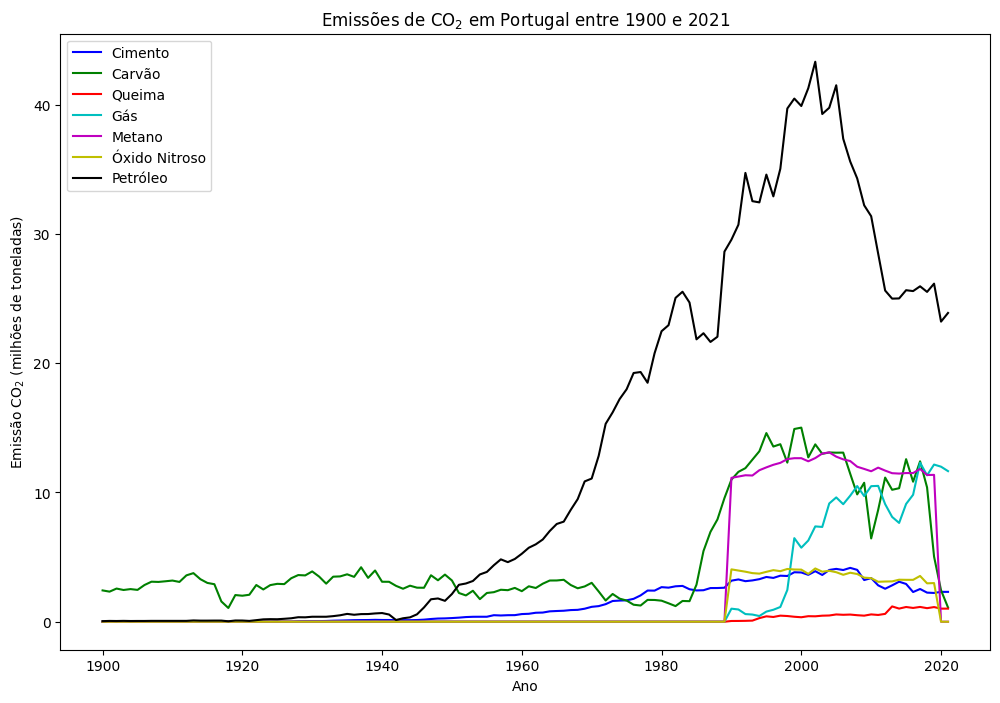

In [25]:
plot_fig, plot_ax = plt.subplots(figsize=(12, 8))
# Configuraçao do ``Axes``.
plot_ax.set_title(r"Emissões de CO$_2$ em Portugal entre 1900 e 2021")
plot_ax.set_xlabel("Ano")
plot_ax.set_ylabel(r"Emissão CO$_2$ (milhões de toneladas)")

graficos = []

# Construir as várias "linhas"
for idx, etiqueta in enumerate(colunas_em_estudo[1:]):
    grafico = plot_ax.plot(
        colunas_em_estudo[0],  # Seria a utilizar para o eixo dos XX.
        colunas_em_estudo[idx + 1],  # Seria a utilizar para o eixo dos YY.
        data=dados_co_pt_plt,  # Estrutura de dados a utilizar, neste caso 1 DataFrame. 
        color=cores[idx],  # Cor da "linha".
        label=etiquetas_series[idx],  # O valor "humano" das etiquetas. 
    )
    # Vou guardar as linhas numa lista caso queira mais tarde referênciar as mesmas.
    graficos.append(grafico)

plot_ax.legend(loc="upper left")

#### Stackplot

A melhor solução será gráfico de camadas: stackplot

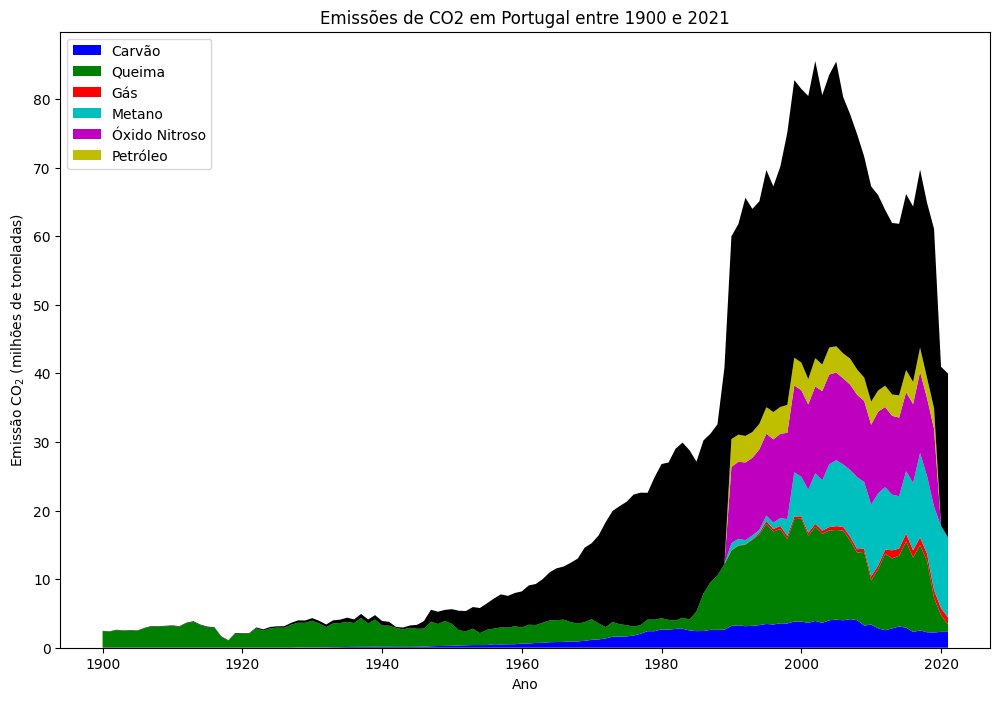

In [26]:
stack_fig, stack_ax = plt.subplots(figsize=(12, 8))
# Configuraçao do ``Axes``.
stack_ax.set_title("Emissões de CO2 em Portugal entre 1900 e 2021")
stack_ax.set_xlabel("Ano")
stack_ax.set_ylabel(r"Emissão CO$_2$ (milhões de toneladas)")

stack_ax.stackplot(
    dados_co_pt_plt["year"].values,  # Valores a utilizar no eixo dos XX
    dados_co_pt_plt.drop("year", axis=1).T,  # Valores das áreas indexadas pelo ano.
    baseline="zero",
    labels=etiquetas_series[1:],  # O valor "humano" das etiquetas.
    colors=cores,  # Cores das áreas.
)
stack_ax.legend(loc="upper left")


In [27]:
dados_co_pt_plt.tail(5)

,year,cement_co2,coal_co2,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2
24573,2017,2.531,12.407,1.144,12.305,11.82,3.54,25.948
24574,2018,2.251,10.389,1.048,11.326,11.35,2.97,25.514
24575,2019,2.225,5.040,1.133,12.158,11.36,2.99,26.153
24576,2020,2.310,2.431,1.013,11.993,0.00,0.00,23.215
24577,2021,2.310,1.102,1.013,11.649,0.00,0.00,23.886


#### bar

É similar à solução que estava no repositório:
https://bitbucket.org/anadi-rita/anadi/src/main/ANADI_TP1.py

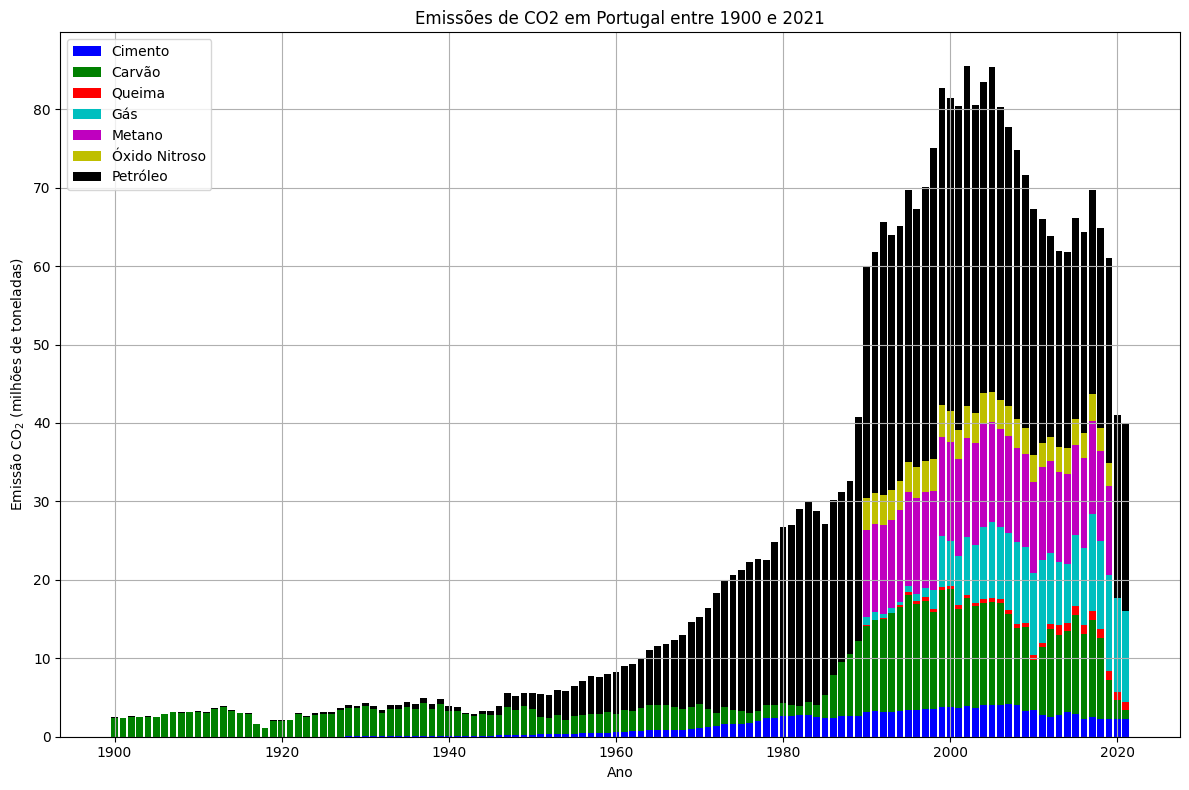

In [28]:
bar_fig, bar_ax = plt.subplots(figsize=(12, 8))
# Configuraçao do ``Axes``.
bar_ax.set_title("Emissões de CO2 em Portugal entre 1900 e 2021")
bar_ax.set_xlabel("Ano")
bar_ax.set_ylabel(r"Emissão CO$_2$ (milhões de toneladas)")
bar_ax.grid(True)

# Inicializar bottom_series com uma Serie de zeros.
bottom_series = [0]*122
areas = []

# Construir as várias "areas"
for idx, etiqueta in enumerate(colunas_em_estudo[1:]):
    area = bar_ax.bar(
        dados_co_pt_plt[colunas_em_estudo[0]],  # Seria a utilizar para o eixo dos XX.
        height=dados_co_pt_plt[colunas_em_estudo[idx + 1]],  # Seria a utilizar para o eixo dos YY.
        bottom=bottom_series,
        color=cores[idx],  # Cor da "linha".
        label=etiquetas_series[idx],  # O valor "humano" das etiquetas. 
    )
    bottom_series += dados_co_pt_plt[colunas_em_estudo[idx + 1]]
    # Vou guardar as areas numa lista caso queira mais tarde referênciar as mesmas.
    areas.append(area)

bar_fig.tight_layout()
bar_ax.legend(loc="upper left")
